<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Preprocesado_y_estructuracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2.3.3: Preprocesado y estructuración de datos

## Limpieza de datos

In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("/stroke-data.csv")
print(df)
nans = df.isnull().values.any()
print("\n - Hay algún NaN en el dataset:", nans)
print("\n - Dime si hay un valor NaN en la fila/columna: \n",df.isna())

# Selecciona columnas que tengan un valor NaN
df_n = df[df.isna().any(axis=1)]
print("\n - Columnas con NaNs:\n", df_n)

# Eliminamos los valores NaN
df = df.dropna()
nans = df.isnull().values.any()
print("\n - Hay algún NaN en el dataset: \n", nans)
print("\n - Dataset limpio: \n", df)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

## Transformación de *datos*

In [26]:
from sklearn import preprocessing
# El método MinMaxScaler de sklearn nos permite aplicar un rescalado en el rango
# especificado
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# Seleccionamos columnas con valores numéricos de interés
df_s = df[['age', 'avg_glucose_level', 'bmi']]
print(" => Datos NO rescalados: \n", df_s[0:5])
# Aplicamos la función de scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_s), columns=df_s.columns)
print(" => Datos rescalados: \n", df_scaled[0:5])

 => Datos NO rescalados: 
     age  avg_glucose_level   bmi
0  67.0             228.69  36.6
2  80.0             105.92  32.5
3  49.0             171.23  34.4
4  79.0             174.12  24.0
5  81.0             186.21  29.0
 => Datos rescalados: 
         age  avg_glucose_level       bmi
0  0.816895           0.801265  0.301260
1  0.975586           0.234512  0.254296
2  0.597168           0.536008  0.276060
3  0.963379           0.549349  0.156930
4  0.987793           0.605161  0.214204


Text(0.5, 1.0, 'Normalizado')

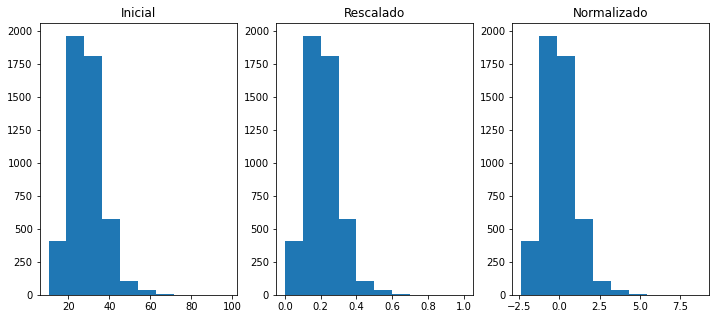

In [43]:
# Normalización 
df_norm = (df_scaled - df_scaled.mean()) / df_scaled.std()

# Veámos el resultado
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(12, 5))
plt.subplot(131)
plt.hist(df['bmi'].values)
plt.title("Inicial")
plt.subplot(132)
plt.hist(df_scaled['bmi'].values)
plt.title("Rescalado")
plt.subplot(133)
plt.hist(df_norm['bmi'].values)
plt.title("Normalizado")